##Module 3 -

### Solution notebook for module 3

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


##Query 3.1 

    Import the file 'gold.csv' (you will find this in the intro section to download or in '/Data/gold.csv' if you are using the jupyter notebook), which contains the data of the last 2 years price action of Indian (MCX) gold standard. Explore the dataframe. You'd see 2 unique columns - 'Pred' and 'new'. One of the 2 columns is a linear combination of the OHLC prices with varying coefficients while the other is a polynomial function of the same inputs. Also, one of the 2 columns is partially filled.
    
    -- Using linear regression, find the coefficients of the inputs and using the same trained model, complete the entire column.
    
    -- Also, try to fit the other column as well using a new linear regression model. Check if the predictions are accurate. Mention which column is a linear function and which is polynomial.
    (Hint: Plotting a histogram & distplot helps in recognizing the discrepencies in prediction, if any.)

In [0]:
import pandas as pd
gold= pd.read_csv('GOLD.csv')

In [0]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


**we can see the columns gold[''Pred] and gold['new'] in the dataframe above.**

**To find out which one is partially filled we can use pandas info( ) function.**

In [0]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 9 columns):
Date        512 non-null object
Price       512 non-null int64
Open        512 non-null int64
High        512 non-null int64
Low         512 non-null int64
Vol.        512 non-null object
Change %    512 non-null object
Pred        411 non-null float64
new         512 non-null float64
dtypes: float64(2), int64(4), object(3)
memory usage: 36.1+ KB


**As we can see above that Pred is the column that is partially filled, we can use the filled portion of this column in training data and make rest of it as testing dataset. The prediction on this test set can then be used to fill the entire column.**

In [0]:
#to generate the training data by dropping rows with any empty column.
gold_train= gold.dropna()

#testing data will be generated by taking rows with any empty column.
gold_test= gold[pd.isnull(gold).any(axis= 1)]

#just to check 
print('The training data has {} samples, and testing data has {} samples.'.format(len(gold_train), len(gold_test)))

The training data has 411 samples, and testing data has 101 samples.


**We can now take our OHLC (open, high, low and close ) as features and both Pred and new as labels to train our linear regression model on.**

**NOTE : the training will be done using the training data we generated earlier.**

In [0]:
#features for our model.
X = gold_train.iloc[:, 1: 5].values

#our label
y = gold_train.iloc[:, 7: 8].values

#jsut to check
print("The features are -- \n {0}\n\nThe labels are -- \n {1}".format(gold_train.iloc[:, 1: 5].head(), gold_train.iloc[:, 7: 8].head()))

The features are -- 
    Price   Open   High    Low
0  28060  28400  28482  28025
1  28184  28136  28382  28135
2  28119  28145  28255  28097
3  27981  28125  28192  27947
4  28007  28060  28146  27981

The labels are -- 
     Pred
0  738.0
1 -146.0
2   30.0
3  357.0
4  124.0


**So we have set our features to be OHLC and our label is Pred right now.**

In [0]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [0]:
#splitting data in training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor_pred = LinearRegression()
regressor_pred.fit(X_train, y_train)

# check the score on test set, the output is the the probablity for correct prediction.
print("The accuracy of test set is {}".format(regressor_pred.score(X_val, y_val) * 100))

The accuracy of test set is 100.0


**The accuracy on test set is 100, which mean our LINEAR REGRESSION model is able to predict correctly everytime, thus suggesting a linear mapping between inputs and output.**

**The result also suggest that Pred is the output, that is linear combination of OHLC input.**

In [0]:
#to find the cofficient of the features in trained model.
print('The cofficient of the inputs are {}' .format(regressor_pred.coef_))

#to find the interceptt of the features in trained model.
print('The intercept of the inputs are {}' .format(regressor_pred.intercept_))

The cofficient of the inputs are [[ 2.  3. -1. -4.]]
The intercept of the inputs are [6.03108674e-11]


**We can see that the cofficients are integer numbers thus for linear equation. Thus suggesting that Pred is infact linear combination of inputs.**

 **coef_1 * low + coef_2 * high + coef_3 * open + coef_4 * price(close) + intercept = Pred.**
 
 **The next task would be to complete the entire column using the same trained model, we will use regressor_pred as that was the column that had empty rows.**
 

In [0]:
#predict the values of Pred for all empty column using gold_test column used earlier.
Pred= regressor_pred.predict(gold_test.iloc[:, 1: 5].values)

In [0]:
#update the rows in gold_test
gold_test['Pred']= Pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
#append gold_test to out original data.
gold [ 411 : ]= gold_test

In [0]:
gold.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,370.033203,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,341.296591,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,164.000000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,322.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,495.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,3024.000000,1407.321485


**We have found correct value of Pred for all the empty rows and updated our dataset.**

**Our next step would be to set new column as a output and find if we have a linear mapping from inputs to output.**

In [0]:
#features for our model.
X = gold_train.iloc[:, 1: 5].values

#our label
y = gold_train.iloc[:, 8 : ].values

#jsut to check
print("The features are -- \n {0}\n\nThe labels are -- \n {1}".format(gold_train.iloc[:, 1: 5].head(), gold_train.iloc[:, 8: ].head()))

The features are -- 
    Price   Open   High    Low
0  28060  28400  28482  28025
1  28184  28136  28382  28135
2  28119  28145  28255  28097
3  27981  28125  28192  27947
4  28007  28060  28146  27981

The labels are -- 
           new
0  117.570740
1  295.430176
2  132.123714
3  101.298064
4  112.153318


In [0]:
#splitting data in training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor_new = LinearRegression()
regressor_new.fit(X_train, y_train)

# check the score on test set, the output is the the probablity for correct prediction.
print("The accuracy of test set is {}".format(regressor_new.score(X_val, y_val) * 100))

The accuracy of test set is 99.99924790346442


**The accuracy on test set is 99.99.. , which mean our LINEAR REGRESSION model is able to predict correctly ALMOST everytime, however this drop in accuracy suggest that there are some higher powers involved in our equation. Thus this mapping is NOT strictly LINEAR**

**The result also suggest that new is the output, that is NOT a linear combination of OHLC input.**

In [0]:
#to find the cofficient of the features in trained model.
print('The cofficient of the inputs are {}' .format(regressor_new.coef_))

#to find the cofficient of the features in trained model.
print('The cofficient of the inputs are {}' .format(regressor_new.intercept_))

The cofficient of the inputs are [[ 1.01216926 -1.00112185  1.00522654 -1.01630605]]
The cofficient of the inputs are [-0.41905518]


**We can see that the cofficients are floating point numbers. Thus suggesting that new is not a linear combination of inputs.**

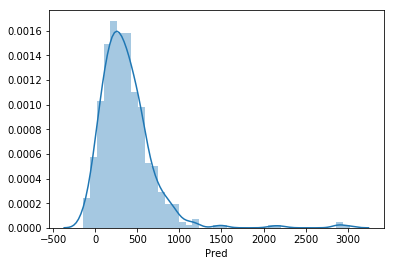

In [0]:
import seaborn as sns
sns.distplot(gold['Pred'])


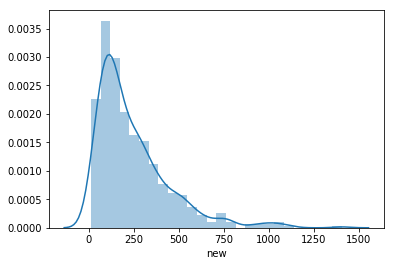

In [0]:
sns.distplot(gold['new'])

**The distplot also suggest that the the data points are evenly distributed in case of Pred, and somewhat skewed in case of new, thus suggesting that the predictions in case of Pred are infact more accurate than in case of new.**



---


##Query3.2 
    Import the stock of your choosing AND the Nifty index. 
    
    Using linear regression (OLS), calculate -
    -- The daily Beta value for the past 3 months. (Daily= Daily returns)
    -- The monthly Beta value. (Monthly= Monthly returns)
    
    
    Refrain from using the (covariance(x,y)/variance(x)) formula. 
    
    Attempt the question using regression.(Regression Reference) 
    Were the Beta values more or less than 1 ? What if it was negative ? 
    Discuss. Include a brief writeup in the bottom of your jupyter notebook with your inferences from the Beta values and regression results.

In [0]:
#import the datasets
Laxmi= pd.read_csv('LAXMIMACH.csv')
nifty50= pd.read_csv('Nifty50.csv')

In [0]:
Laxmi_3_mo= Laxmi[:][432 : 494]
nifty50_3_mo= nifty50[:][432 : 494]

**We will get data for last 3 months, on average a quarter is taken to be 63 days longer.**

In [0]:
daily_prices = pd.concat([Laxmi_3_mo['Close Price'], nifty50_3_mo['Close']], axis=1)
daily_prices.columns = ['Laxmi', 'nifty50']

**We will create a new dataframe called daily_prices with closing prices of LAXMIMACH and our index that is, Nifty50.**

**The next step would be to calculate the daily percentage changes for both the columns and drop all NaN from our updated dataframe.**

In [0]:
daily_returns = daily_prices.pct_change(1)
clean_daily_returns = daily_returns.dropna(axis=0)  # drop first missing row
print(clean_daily_returns.head(10))

        Laxmi   nifty50
433 -0.006529 -0.011365
434 -0.007550 -0.005007
435 -0.015285 -0.005271
436 -0.001460 -0.003485
437  0.001751 -0.004410
438 -0.016076 -0.002015
439 -0.012447 -0.007781
440  0.003728 -0.003440
441  0.000231  0.012363
442  0.008970  0.005067


**Good! Now that we have a clean set of daily returns on LAXMIMACH and Nifty 50. Let’s go ahead and make the Ordinary Least Square (OLS)Regression with Statsmodels.**


In [0]:
import statsmodels.api as sm
# split dependent and independent variable
X = clean_daily_returns['nifty50']
y = clean_daily_returns['Laxmi']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Laxmi   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     10.95
Date:                Fri, 12 Jul 2019   Prob (F-statistic):            0.00160
Time:                        05:41:25   Log-Likelihood:                 191.61
No. Observations:                  61   AIC:                            -379.2
Df Residuals:                      59   BIC:                            -375.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.001     -0.621      0.5

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# alternatively scipy linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

#the slope of the regression lines denotes the beta.
print(slope)

0.6543587998923448


###Interpretation of a Beta result

    A stock with a beta of:
    -> zero indicates no correlation with the chosen benchmark (e.g. NASDAQ index )
    -> one indicates a stock has the same volatility as the market
    -> more than one indicates a stock that’s more volatile than its benchmark
    -> less than one is less volatile than the benchmark
    -> 1.5 is 50% more volatile than the benchmark



**Thus value of beta is 0.6544, As you can see from the summary, the coefficient value for (LAXMIMACH) is 0.6544. This suggest that the Laxmimach have be LESS volatile than Nifty 50 over the course of last 3 months.**

**In this method, we regress the company’s stock returns against the market’s returns. The beta (β) is represented by the slope of the regression line.**

 **stock_return= 0.6543 * market_return + (- 0.0008)**

**Next step would be to do the same for monthly beta values, that is to find out the beta values monthly returns for last 3 years.**

**We would group both our datasets by months and years, to get monthly closing prices for both the data sets and calculate monthly percentage change.**

In [0]:
Laxmi['Date']= pd.to_datetime(Laxmi['Date'])

nifty50['Date']= pd.to_datetime(nifty50['Date'])

In [0]:
#initialize a new column and provide 0 value to each of its row.
Laxmi['month']= 0

#now for entire length of data we would replce the 0 with month value
#we can get month value from data['Date']
for i in range (0, 494):
  Laxmi['month'][i]= Laxmi['Date'][i].month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#initialize a new column and provide 0 value to each of its row.
nifty50['month']= 0

#now for entire length of data we would replce the 0 with month value
#we can get month value from data['Date']
for i in range (0, 494):
  nifty50['month'][i]= nifty50['Date'][i].month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#initialize a new column and provide 0 value to each of its row.
Laxmi['year']= 0

#now for entire length of data we would replce the 0 with month value
#we can get month value from data['Date']
for i in range (0, 494):
  Laxmi['year'][i]= Laxmi['Date'][i].year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#initialize a new column and provide 0 value to each of its row.
nifty50['year']= 0

#now for entire length of data we would replce the 0 with month value
#we can get month value from data['Date']
for i in range (0, 494):
  nifty50['year'][i]= nifty50['Date'][i].year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
Laxmi.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,month,year
0,LAXMIMACH,EQ,2017-05-15,4552.40,4619.95,4670.0,4550.05,4606.0,4614.05,4629.76,4275,19792243.95,1097,2447,57.24,5,2017
1,LAXMIMACH,EQ,2017-05-16,4614.05,4566.05,4650.0,4564.10,4582.0,4589.80,4612.18,4467,20602592.70,805,2961,66.29,5,2017
2,LAXMIMACH,EQ,2017-05-17,4589.80,4500.00,4675.2,4500.00,4610.0,4637.25,4608.88,6320,29128119.85,1035,2876,45.51,5,2017
3,LAXMIMACH,EQ,2017-05-18,4637.25,4599.95,4624.8,4515.10,4515.1,4544.45,4567.74,4500,20554835.90,831,2776,61.69,5,2017
4,LAXMIMACH,EQ,2017-05-19,4544.45,4586.90,4648.0,4490.00,4521.0,4522.70,4556.21,4190,19090528.50,990,1944,46.40,5,2017


In [0]:
#to group both the datasets by months and years.
Laxmi=Laxmi.groupby([(Laxmi['year']),(Laxmi['month'])]).sum()

nifty50=nifty50.groupby([(nifty50['year']),(nifty50['month'])]).sum()

In [0]:
nifty50.head()

Open       High  ...  Shares Traded  Turnover (Rs. Cr)
year month                        ...                                  
2017 5      123350.50  123923.35  ...     3033425674          152111.08
     6      202049.90  202510.25  ...     3667933334          194462.80
     7      206712.80  207362.90  ...     3849451776          208783.83
     8      208332.50  208864.70  ...     4296596163          223540.74
     9      209966.65  210486.50  ...     4294085247          218201.28

[5 rows x 6 columns]

In [0]:
#make a new dataframe with closing prices for both the datasets.
monthly_prices = pd.concat([Laxmi['Close Price'], nifty50['Close']], axis=1)
monthly_prices.columns = ['Laxmi', 'nifty50']

In [0]:
monthly_prices.head(5)

Laxmi    nifty50
year month                      
2017 5       58758.95  123481.25
     6      106507.35  201746.05
     7      113280.40  206852.50
     8      125756.05  207924.85
     9      124913.60  209536.25

In [0]:
#calculate percentage changes in monthly prices for both the datasets.
#don't forget to drop all the null values from the new dataframe.
monthly_returns = monthly_prices.pct_change(1)
clean_monthly_returns = monthly_returns.dropna(axis=0) *100  # drop first missing row
print(clean_monthly_returns.head(5))

                Laxmi    nifty50
year month                      
2017 6      81.261493  63.381930
     7       6.359232   2.531128
     8      11.013070   0.518413
     9      -0.669908   0.774992
     10     -6.279500  -3.227461


**Good! Now that we have a clean set of monthly returns on LAXMIMACH and Nifty 50. Let’s go ahead and make the Ordinary Least Square (OLS)Regression with Statsmodels.**


In [0]:
import statsmodels.api as sm
# split dependent and independent variable
X = clean_monthly_returns['nifty50']
y = clean_monthly_returns['Laxmi']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Laxmi   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     238.5
Date:                Fri, 12 Jul 2019   Prob (F-statistic):           2.74e-13
Time:                        05:45:16   Log-Likelihood:                -80.383
No. Observations:                  24   AIC:                             164.8
Df Residuals:                      22   BIC:                             167.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7036      1.471      0.478      0.6

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# alternatively scipy linear regression
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)

print(slope)

1.1617715669800723


**As you can see from the summary, the coefficient value for (LAXMIMACH) is 1.1635, which is also confirmed by the slope of our linear mapping.**

**Thus we can infer that our beta value for our monthly returns over the last 3 years is greater than 1, thus suggesting thet our stock i.e. LAXMIMACH is MORE volatile than it's benchmark i.e. Nifty 50.**

**In this method, we regress the company’s stock returns against the market’s returns. The beta (β) is represented by the slope of the regression line.**

 **stock_return= 1.1617 * market_return + (0.7036)**
 
**High-beta stocks are supposed to be riskier but provide a potential for higher returns; low-beta stocks pose less risk but also lower returns, we can understand that for last 3 months our stocks is infact less volatile than market index, we can confirm this by seeing the trend in our stocks for last 3 months, but over the last 3 years our stock has shown higher volitality over the monthly returns and thus offer high returns at the cost of high risk.**